# Pima Indians Onset of Diabetes - Logistic Regression

***This is for classification where we predict a category or class (a binary variable: 0, 1).***

**Dataset Used:** Pima Indians onset of diabetes dataset (CSV).

**Data Source:** UCI Machine Learning repository. 

**Data Overview**: N = 758 patients

It describes patient medical record data for female (at least 21 years of age) Pima Indians and whether they had an onset of diabetes within five years.

**Problem Type:** binary classification problem (onset of diabetes as 1 or not as 0)

**Input Variables (X):**

1) Number of times pregnant
2) Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3) Diastolic blood pressure (mm Hg)
4) Triceps skin fold thickness (mm)
5) 2-Hour serum insulin (mu U/ml)
6) Body mass index (weight in kg/(height in m)^2)
7) Diabetes pedigree function
8) Age (years)

**Output Variable (y):**

Class variable (0 or 1)

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Importing the dataset

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv') #dataset has no column headers so header = None
X = dataset.iloc[:, :-1].values #X inputs (features) are all rows and all columns EXCEPT the last one.
y = dataset.iloc[:, -1].values #y output (dependent variable) includes all rows but ONLY the last column.

The features of the dataset need to be in the 1st columns and the depedent variable needs to be in the last (right-most) column. 

**Line 2**: X = dataset.iloc[:, :-1].values

Selects all the columns and their rows,  except the last column.

[:, :-1] <--  the colon (:) means all of the rows are to be selected. The :-1 means all of the columns except the last one are selected. So [:, :-1] means select all of the columns up to, but not including, the last one and all of the columns' rows. 

**Line 3**: y = dataset.iloc[:, -1].values

Selects the last column only and all of its rows, regardless of the number of features in the dataset. [ :, -1 ] where the : means all the rows and the - 1 means all the columns except the last one....so all the rows for the last column only.


In [3]:
#Checking the dataset's info and head (1st 5 entries)
display(dataset.info(),dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#summarize the data
print(dataset.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


# Cleaning The Data

If you look through the min. (minimum) data in the 'summarize the data' section above, you'll notice a lot of zeros (0's). Here are the columns for which values of zero don't make sense (the patient would be deceased with a zero in any of these columns):

*   Glucose
*   Blood Pressure
*   SkinThickness
*   Insulin
*   BMI

Let's look at how many 0 values there are by column (excluding that last column (outpout) which SHOULD have 1's and 0's).







In [5]:
#Finding Zeros
def finding_zeros(frame):
  columns = frame.columns[:8]  #The column labels of the DataFrame...the first 8 columns.
  for i in columns:
    zeros = len(frame.loc[frame[i] == 0])  #This line counts the number of 0 values in each column. frame.loc >> Access a group of rows and columns by label(s) or a boolean array..loc[] is primarily label based, but may also be used with a boolean array.
    print(f'The number of 0 values in {i} = {zeros}') #This is an f-string: The idea behind f-strings is to make string interpolation simpler. To create an f-string, prefix the string with the letter “ f ”.  

finding_zeros(dataset)
  

The number of 0 values in Pregnancies = 111
The number of 0 values in Glucose = 5
The number of 0 values in BloodPressure = 35
The number of 0 values in SkinThickness = 227
The number of 0 values in Insulin = 374
The number of 0 values in BMI = 11
The number of 0 values in DiabetesPedigreeFunction = 0
The number of 0 values in Age = 0


As you can see above, there are a LOT of zero values. I'll replace the zeros with NaN.

In [6]:
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

Let's plot the missing data points now.

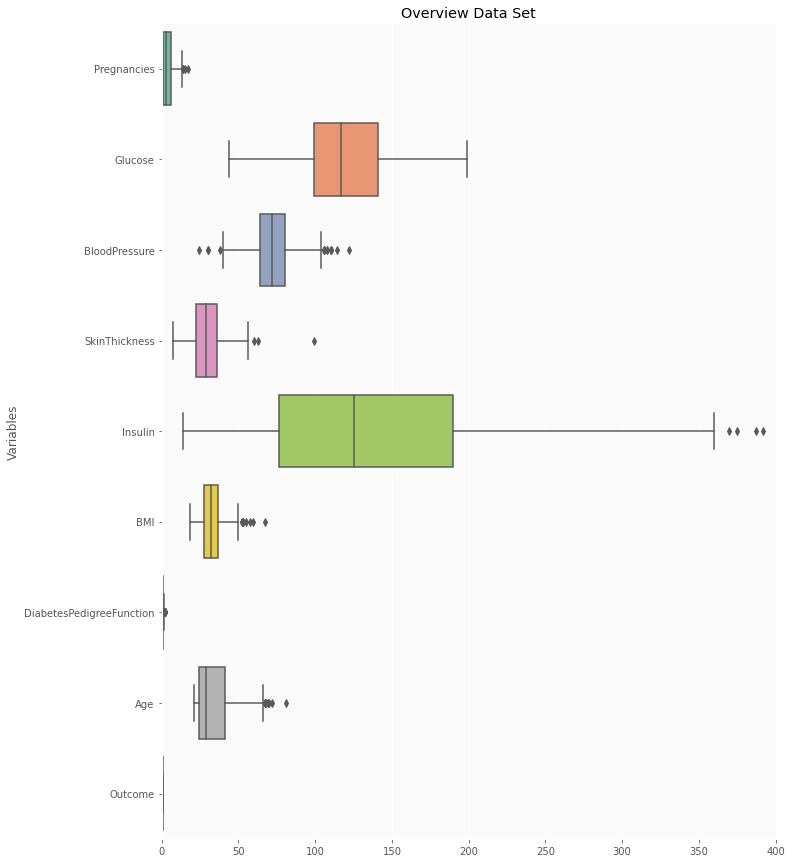

In [7]:
# Boxplots
plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-0.05,400))
plt.ylabel('Variables')
plt.title('Overview Data Set')
ax = sns.boxplot(data = dataset, orient = 'h', palette = 'Set2')

In the boxplots above, you can see the zero values are encoded with NaN values now. 

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

***Lines 1 & 2 will create a test set and training set from the entire dataset we uploaded/imported.***

**Line 2**: X_train, X_test, y_train, y_test = train_test_split(**X**, **y**, test_size = 0.20, random_state = 0)

Where **X** is the matrix of features X and **y** is the the dependent variable vector y. 

***test_size *** 20% of data for testing is standard. That leaves 80% for training.

In [9]:
 print(X_train) 

[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [10]:
print(y_train) 

[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 

In [11]:
print(X_test) #<---X_test is supposed to be new data in production. We'll pretend X_test is new observations we can apply the model to to see how it predicts.

[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]


In [12]:
print(y_test) #<--prints all predictions (0 or 1) for the test set. 

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


# Feature Scaling

**Why feature scaling here? It's not required for logistic regression, but applying it will improve the training performance and the final predictions.** 

**For some models liks SVR, feature scaling is an absolute necessity.**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Lines 1 -4**: 

We want to feature scale our X inputs ('features'). We do NOT need to feature scale the depedent variable (diabetes onset or no onset) since it's already 0, 1 for values. As shown in the print-out below, the two features now have values from -3 to +3 which is perfect.

**>>> Feature scaling MUST happen AFTER we split the training set and test set so we avoid information leakage from the test set.**  



In [14]:
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [15]:
print(X_test)

[[-0.8354355   2.45735903  0.34674316 ...  1.35224513  2.78594417
  -0.96569189]
 [-0.54480808 -0.43719633  0.24436264 ...  0.17619533 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.41253563 -0.36992051 ...  0.22677812 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.66399321  0.85864578 ...  1.4913478   0.53623395
  -0.96569189]
 [-0.25418066 -0.15403331  0.24436264 ... -0.74694053 -1.07971278
  -0.79911377]
 [-0.8354355  -0.43719633  0.14198211 ... -0.17788417  1.06487079
  -0.79911377]]


# Training the Logistic Regression model on the Training set

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Line 2**: classifier = LogisticRegression(random_state = 0)

***random_state = 0*** <---Normally would not have to enter this parameter....so in the future, omit it.

Line 2 simply builds the Logistic Regression model.  

**Line 3**: classifier.fit(X_train, y_train)

Trains classifier on the training set.You need to call the fit method which takes two inputs (sets of data): the matrix of features of the training set and the dependent variable vector (the last column of data in the dataset).

# Predicting a new result

In [17]:
print(classifier.predict(sc.transform([[1, 199, 76, 43, 0.0, 42.9, 1.394, 22]]))) #<--predicts 0 or 1 (no or yes)

[1]


In [18]:
print(classifier.predict_proba(sc.transform([[1, 199, 76, 43, 0.0, 42.9, 1.394, 22]]))) #<--predicts a PROBABILITY 

[[0.03968903 0.96031097]]



***The transform method is used here so it matches the same format of the data in the training set.***

***sc = StandardScaler***

**print(classifier.predict(sc.transform([[1, 199, 76, 43, 0.0, 42.9, 1.394, 22]])))**

Enter the data for the 1st patient in the X_test set. We'll enter these inputs and predict whether or not she has an onset of diabetes. This is the 1st person in X_test dataset above. The model predicted this person has an onset of diabetes which is a TRUE (correct prediction. 

**print(classifier.predict_proba(sc.transform([[1, 199, 76, 43, 0.0, 42.9, 1.394, 22]])))**:  We can use this instead to produce a probability of whether or not the female patient has an onset of diabetes. For the 1st patient in the dataset, the result it: [[0.03968903 0.96031097]] meaning there's a 4% chance she does not and a 96% chance she does have an onset. 

# Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test) 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #Column 1 = predicted result, column 2 = actual results

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

***Column 1 = predicted result, column 2 = actual results***

# Making the Confusion Matrix For The TEST Set

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))     
print('Precision Score:', precision_score(y_test, y_pred))

[[98  9]
 [18 29]]
Accuracy Score: 0.8246753246753247
Recall Score: 0.6170212765957447
Precision Score: 0.7631578947368421


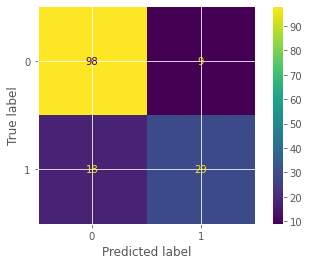

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

**Line 2**: cm = confusion_matrix(y_test, y_pred)

Creates a confusion matrix of the y_test variables vs. the y_pred (predicted) outcomes. 

**Confusion Matrix Interpretation**:  This is for the TEST set only.

[[**98**   **9**] <--**98** correct predictions of the class zero (0; no onset of diabetes), **9** incorrect predictions of class 1 (false positives) meaning 9 predictions that patients HAD onset of diabetes but in reality they did not.

 [ **18   29**]] <--**18** type II errors (false negatives)...these are very bad errors, **29** correc predictions for patients with an onset of diabetes (who really had it).

 **Lines 6-8**: Various metrics for the model.

**Line 6**: accuracy_score(y_test, y_pred)

Total correct predictions / total observations; accuracy_score = (98+29)/154 total observations 

**Line 7**: Provides the accuracy score on the test set.

 **Recall_Score**: Recall Score: 0.6170212765957447 (~62%)

 Formula: TP/(TP + FN); 29/(29+18) = 0.617

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
 
This is a really important score as it tells how good the model is at minimizing false negatives (type II errors...the really bad erros to make). You want to avoid predicting that a patient does NOT have a medical condition when they really do have a medical condition. They may not go on to receive treatment and that is a very bad.

**Dimensions**: Each feature (input X) correpsonds to a dimension. In this example, we have 8 features (8 dimensions) so we cannot visualize the plot.Humans cannot vizualize more than 3 dimensions (3D).




#Conclusion

Given the recall score is 61%, this isn't very good. With medical applications, Type II errors (False-Negative) can be very dangerous as patients have a medical condition but the model is predicting they do not. As a result, the patient may not go on to receive the proper diagnosis and treatment. 

**How might I improve this? **

I noticed quite a few columns have zero values which don't make sense. For example, a patient cannot have a diastolic blood pressure of zero, otherwise they would be deceased. I believe by dealing with nonsensical zero values, the model would have an improved overall accuracy score along with a recall score. 


